In [83]:
import torch
t = torch
from torch import nn, optim
import w1d4_tests
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from torchvision import transforms
import einops
from tqdm.notebook import tqdm
import math

In [17]:
# https://www.motorbiscuit.com/wp-content/uploads/2021/09/Drive-through-Redwood-tree.jpg
fname = "/home/ubuntu/mlab/days/w1d4/picture.jpeg"

In [37]:
# w1d4_tests.plot_image(fname)
data_train, data_test = w1d4_tests.load_image(fname)
# print(data_train.dataset['tensors'].__dict__)


class OurModule(t.nn.Module):

    def __init__(self, P, H, K):
        super().__init__()

        self.seq = t.nn.Sequential(
            t.nn.Linear(P,H),
            t.nn.ReLU(),
            t.nn.Linear(H,H),
            t.nn.ReLU(),
            t.nn.Linear(H,K),
        )

    def forward(self, x):
        return self.seq(x)



w1d4_tests.test_mlp(OurModule)



Congrats! You've passed the test.


In [47]:

def loss_fn(predicted, target):
    return t.mean(t.abs(target - predicted))

def train(model, dataloader, lr, momentum):
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    for input, target in dataloader:
        optimizer.zero_grad()    # sets param.grad to None for linked params
                                 # (this prevents accumulation of gradients)
        output = model(input)          # the model’s predictions
        loss = loss_fn(output, target)      # measure how bad predictions are
        loss.backward()              # calculate gradients
        optimizer.step()              # use gradients to update params
    return model


w1d4_tests.test_train(train)

Congrats! You've passed the test.


In [75]:
def evaluate(model, dataloader):
    total_loss = 0
    for input, target in dataloader:
        # print(target)
        output = model(input)
        loss = loss_fn(output, target)
        total_loss += loss*input.size(dim=0)
    return total_loss/len(dataloader.dataset)

w1d4_tests.test_evaluate(evaluate)

Congrats! You've passed the test.


tensor([[ 0.3549,  0.2765,  0.1824],
        [-0.2608, -0.3118, -0.3863],
        [ 0.1941, -0.0569, -0.2373],
        [-0.4451, -0.4804, -0.5000],
        [-0.3588, -0.3706, -0.3902],
        [ 0.4412,  0.3392, -0.0333],
        [-0.3000, -0.3275, -0.3588],
        [-0.3549, -0.3941, -0.3980],
        [-0.3039, -0.3275, -0.3745],
        [-0.1118, -0.0020,  0.0137],
        [ 0.1588,  0.0373, -0.2137],
        [ 0.4098,  0.2373,  0.1863],
        [ 0.2255,  0.1275, -0.0843],
        [ 0.4961,  0.4490,  0.3863],
        [-0.3627, -0.4137, -0.4451],
        [-0.1353, -0.1588, -0.2451],
        [ 0.1824, -0.1078, -0.3627],
        [-0.3039, -0.4255, -0.5000],
        [-0.2608, -0.2843, -0.3314],
        [ 0.3745,  0.1392, -0.1471],
        [-0.1941,  0.0176,  0.0647],
        [-0.3667, -0.3941, -0.4686],
        [-0.3157, -0.3471, -0.3902],
        [ 0.4922,  0.4490,  0.3784],
        [ 0.4490,  0.3000, -0.0255],
        [-0.3667, -0.3941, -0.4333],
        [-0.2333, -0.3392, -0.3745],
 

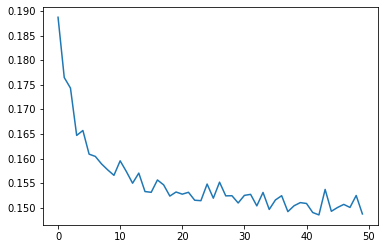

In [72]:
model = OurModule(2, 400, 3)    # this is a nn.Module
# # optimizer represents the algorithm we use for updating parameters
test_losses = []
for epoch in tqdm(range(50)):
    train(model, data_train, 0.01, 0.9)
    test_loss = evaluate(model, data_test)
    test_losses.append(test_loss)

plt.plot(test_losses)


In [73]:
img = Image.open(fname)
tensorize = transforms.ToTensor()
img = tensorize(img)
c, h, w = img.size()

t_img = t.zeros(h, w, 2)
t_img[...,0] = einops.rearrange(t.linspace(-.5, .5, h), 'h -> h 1')
t_img[...,1] = einops.rearrange(t.linspace(-.5, .5, w), 'w -> 1 w')
# print(t_img)
new_img = model(t_img)
print(new_img)


tensor([[[-0.3406, -0.2100, -0.2062],
         [-0.3399, -0.2096, -0.2060],
         [-0.3393, -0.2091, -0.2058],
         ...,
         [-0.3757, -0.3644, -0.3989],
         [-0.3761, -0.3647, -0.3991],
         [-0.3765, -0.3650, -0.3994]],

        [[-0.3410, -0.2107, -0.2068],
         [-0.3404, -0.2103, -0.2066],
         [-0.3398, -0.2098, -0.2064],
         ...,
         [-0.3757, -0.3646, -0.3991],
         [-0.3761, -0.3649, -0.3993],
         [-0.3765, -0.3652, -0.3996]],

        [[-0.3415, -0.2114, -0.2074],
         [-0.3409, -0.2110, -0.2072],
         [-0.3403, -0.2106, -0.2070],
         ...,
         [-0.3757, -0.3648, -0.3993],
         [-0.3761, -0.3651, -0.3996],
         [-0.3765, -0.3654, -0.3998]],

        ...,

        [[ 0.3904,  0.3290,  0.1587],
         [ 0.3909,  0.3294,  0.1591],
         [ 0.3913,  0.3298,  0.1594],
         ...,
         [ 0.4349,  0.3695,  0.1330],
         [ 0.4347,  0.3693,  0.1325],
         [ 0.4345,  0.3691,  0.1321]],

        [[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


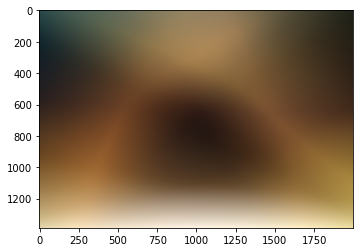

In [74]:
matplotlib.pyplot.imshow((new_img + 0.5).detach().numpy())

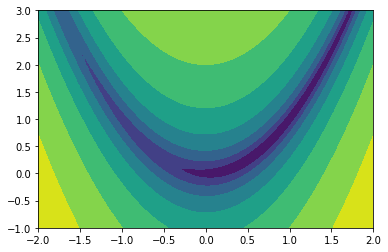

In [85]:
def banana(x, y, a=1, b=100):
    return (a-x)**2 + b*(y-x**2)**2 + 1
def tuple_log_banana(xy):
    return math.log(banana(*xy))

n_values = 100
t_img = t.zeros(n_values, n_values, 2)
t_img[...,0] = einops.rearrange(t.linspace(-2, 2, n_values), 'h -> h 1')
t_img[...,1] = einops.rearrange(t.linspace(-1, 3, n_values), 'w -> 1 w')


plt.contourf(t_img[...,0], t_img[...,1],
    t.tensor(list(map(tuple_log_banana, t_img.reshape(-1,2)))).reshape(n_values, n_values))

In [90]:
def opt_rosenbrock(xy, lr, momentum, n_iter):
    optimizer = optim.SGD([xy], lr=lr, momentum=momentum)
    for e in range(n_iter):
        # print(xy)
        optimizer.zero_grad()
        loss = banana(*xy)
        loss.backward()
        optimizer.step()
    return xy

w1d4_tests.test_rosenbrock(opt_rosenbrock)


tensor([-1.5000,  2.5000], requires_grad=True)
tensor([-1.6450,  2.4500], requires_grad=True)
tensor([-1.4712,  2.5012], requires_grad=True)
tensor([-1.6644,  2.4339], requires_grad=True)
tensor([-1.4351,  2.5012], requires_grad=True)
tensor([-1.6837,  2.4128], requires_grad=True)
tensor([-1.3941,  2.4973], requires_grad=True)
tensor([-1.6981,  2.3865], requires_grad=True)
tensor([-1.3551,  2.4859], requires_grad=True)
tensor([-1.7025,  2.3560], requires_grad=True)

Testing configuration:  {'lr': 0.001, 'momentum': 0.0, 'n_iter': 10}
Your module returns different results from the example solution.
tensor([-1.5000,  2.5000], requires_grad=True)
tensor([-1.6450,  2.4500], requires_grad=True)
tensor([-1.5872,  2.4612], requires_grad=True)
tensor([-1.4990,  2.4818], requires_grad=True)
tensor([-1.5642,  2.4513], requires_grad=True)
tensor([-1.6141,  2.4260], requires_grad=True)
tensor([-1.5330,  2.4416], requires_grad=True)
tensor([-1.5191,  2.4358], requires_grad=True)
tensor([-1.5808,  2